# Linear Regression Simple

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

For reproducibility, set a random seed

In [3]:
np.random.seed(777)

Input

In [10]:
x = np.linspace(0, 1, 100, dtype = np.float32)
slopes = 1
intercept = np.random.normal(2, 0.2, 100).astype(np.float32)

output

In [11]:
y = x * slopes + intercept

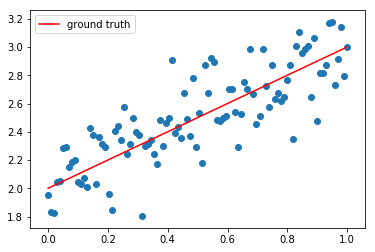

In [12]:
plt.scatter(x, y)
plt.plot(x, x * 1 + 2., label = "ground truth", c = "r")
plt.legend()

## Let's go with Tensorflow

Define input with placeholder

In [13]:
x_pl = tf.placeholder(tf.float32, [100,], name = "x_pl")
y_pl = tf.placeholder(tf.float32, [100,], name = "y_pl")

Define Variable(Weight or Parameter)

In [17]:
w = tf.Variable(0.1, tf.float32)
b = tf.Variable(0.0, tf.float32)

Define prediction(y_hat or hypothesis)
- input : (100,)
- output : (100,)

In [18]:
pred = x_pl * w + b

Define loss(Objective or cost)

In [21]:
loss = tf.reduce_mean(tf.square(pred - y))

Define Optimization(Training)

In [22]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(loss)

Start a session

In [23]:
sess = tf.Session()

Initialize all variables

In [26]:
sess.run(tf.global_variables_initializer())

In [27]:
loss_list, w_list, b_list = [], [], []

Run session. **train_op, loss, w, b** need to be applied in the sess.run to update. 

+ x_pl ← x, y_pl ← y 

In [31]:
writer = tf.summary.FileWriter('./graphs', tf.get_default_graph())
for epoch in range(20):
    _, _loss, _w, _b = sess.run([train_op, loss, w, b], {x_pl:x, y_pl:y})
    print(epoch + 1, '\t', _loss, '\t', _w, '\t', _b)
    loss_list.append(_loss)
    w_list.append(_w)
    b_list.append(_b)

1 	 0.0380525 	 1.08534 	 1.95515
2 	 0.0379736 	 1.084 	 1.95769
3 	 0.0379062 	 1.08249 	 1.95985
4 	 0.0378458 	 1.08087 	 1.96174
5 	 0.0377899 	 1.07917 	 1.9634
6 	 0.0377372 	 1.07741 	 1.96491
7 	 0.0376867 	 1.07562 	 1.96629
8 	 0.037638 	 1.07382 	 1.96757
9 	 0.037591 	 1.07201 	 1.96878
10 	 0.0375453 	 1.07019 	 1.96992
11 	 0.037501 	 1.06839 	 1.97102
12 	 0.0374579 	 1.06659 	 1.97208
13 	 0.0374159 	 1.06481 	 1.97311
14 	 0.0373751 	 1.06305 	 1.97411
15 	 0.0373354 	 1.06131 	 1.97508
16 	 0.0372968 	 1.05958 	 1.97604
17 	 0.0372592 	 1.05787 	 1.97698
18 	 0.0372225 	 1.05619 	 1.9779
19 	 0.0371869 	 1.05452 	 1.9788
20 	 0.0371522 	 1.05288 	 1.97969


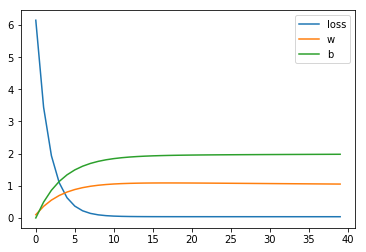

In [32]:
plt.plot(loss_list, label = "loss")
plt.plot(w_list, label = "w")
plt.plot(b_list, label = "b")
plt.legend()
plt.show()

## With Tensorboard 

![Tensorboard](./images/Linear Regression Simple.png)